# Predicting Leukemia Remission Occurance Using Logistic Regression
## Machine Learning, Assignment - 1 
---
Submitters 
<table style="float:left">
    <tbody>
        <tr>
            <td>1</td>
            <td>Nageswar Rao</td>
            <td> * </td>
        </tr>
         <tr>
            <td>2</td>
            <td>Saranya</td>
            <td> * </td>
        </tr>
         <tr>
            <td>3</td>
            <td>Prabha Sasikanth</td>
            <td>2018ABO4094</td>
        </tr>
    </tbody>
</table>


## Table of Contents  <span id="0" ></span>
1. [Import Datasets](#1)
2. [Extracting input and target variables](#2)
* [Visualizing and Exploring dataset](#3)
* [Traning set and Test set](#4)
* [Train a Logistic Regression Model](#5)
* [Coefficients](#6)
* [Accuracy and Confusion Matrix](#7)
* [Decision Boundary](#8)
* [Positively associated features with the target column.](#9)
* [Predict for Given Data](#10)


---

# Problem 


Consider data published on n = 27 leukemia patients. The data (leukemia_remission.csv) has a response variable of whether leukemia remission occurred (REMISS), which is given by a 1.

### Data Source 

[Leukemia Remission]("https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/leukemia_remission/index.txt")


The predictor variables are 
1. cellularity of the marrow clot section (CELL), 
2. smear differential percentage of blasts (SMEAR), 
3. percentage of absolute marrow leukemia cell infiltrate (INFIL), 
4. percentage labeling index of the bone marrow leukemia cells (LI), 
5. absolute number of blasts in the peripheral blood (BLAST), 
6. and the highest temperature prior to start of treatment (TEMP).

<span id="1"></span>
## 1. Import Datasets 
[[top]](#0)



In [413]:
import csv
import sys
import urllib.request as req
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
sb.set(style="white")
sb.set(style="whitegrid", color_codes=True)

dataurl = 'https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/leukemia_remission/index.txt'
req.urlretrieve(dataurl, './leukemia_remission.txt')

('./leukemia_remission.txt', <http.client.HTTPMessage at 0x1a2c9f9358>)

Convert to CSV and form a DataFrame.

In [414]:
df = pd.read_csv('leukemia_remission.txt', sep="\t", encoding='utf-16', header='infer')
df.describe()
xtrain.head()
df[22:]

,REMISS,CELL,SMEAR,INFIL,LI,BLAST,TEMP
22,1,1.00,0.58,0.58,1.0,0.53,1.00
23,0,0.95,0.32,0.30,1.6,0.89,0.99
24,1,1.00,0.60,0.60,1.7,0.96,0.99
25,1,1.00,0.69,0.69,0.9,0.40,0.99
26,0,1.00,0.73,0.73,0.7,0.40,0.99



<span id="2"></span>
## 2. Extracting input and target variables
[[top]](#0)



In [456]:
features = df[:][['CELL','SMEAR','INFIL','LI','BLAST','TEMP']]
#features = df[:][['SMEAR','INFIL','LI','BLAST']]
#features = df[:][['INFIL','BLAST']]
target =  df[:]['REMISS']

x = features
y = target

print ("Type and Shape " , type(y),y.shape)
print ("Type and Shape " , type(x),x.shape)


Type and Shape  <class 'pandas.core.series.Series'> (27,)
Type and Shape  <class 'pandas.core.frame.DataFrame'> (27, 6)




<span id="3"></span>
### 3. Visualizing and Exploring dataset
[[top]](#0)



In [457]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
REMISS    27 non-null int64
CELL      27 non-null float64
SMEAR     27 non-null float64
INFIL     27 non-null float64
LI        27 non-null float64
BLAST     27 non-null float64
TEMP      27 non-null float64
dtypes: float64(6), int64(1)
memory usage: 1.6 KB


In [458]:

x.head()

,CELL,SMEAR,INFIL,LI,BLAST,TEMP
0,0.8,0.83,0.66,1.9,1.10,1.00
1,0.9,0.36,0.32,1.4,0.74,0.99
2,0.8,0.88,0.70,0.8,0.18,0.98
3,1.0,0.87,0.87,0.7,1.05,0.99
4,0.9,0.75,0.68,1.3,0.52,0.98


**Filter out records leukemia remission occured and remission not occured and plot**


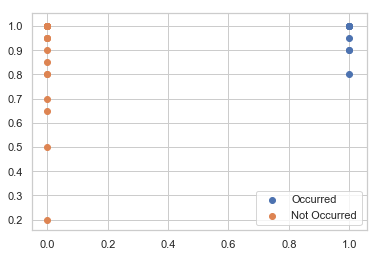

In [459]:
occ = df.loc[y == 1]
noc = df.loc[y == 0]
plt.scatter(occ.iloc[:, 0], occ.iloc[:, 1], label='Occurred')
plt.scatter(noc.iloc[:, 0], noc.iloc[:, 1], label='Not Occurred')
plt.legend()


Index(['REMISS', 'CELL', 'SMEAR', 'INFIL', 'LI', 'BLAST', 'TEMP'], dtype='object')

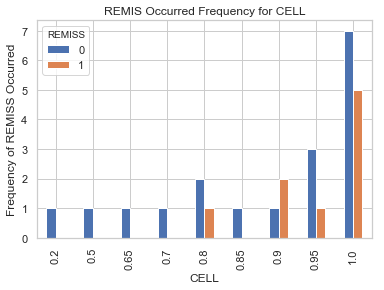

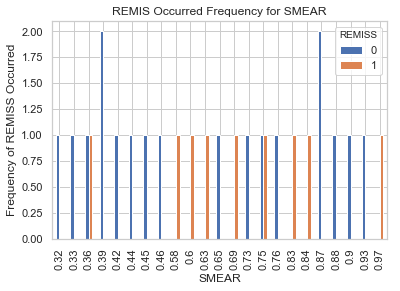

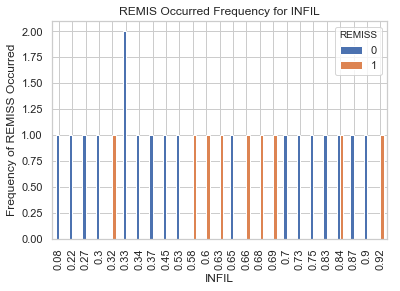

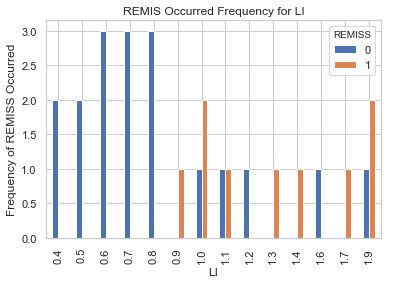

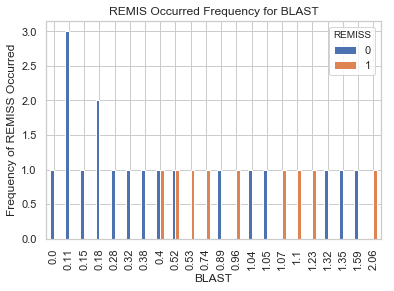

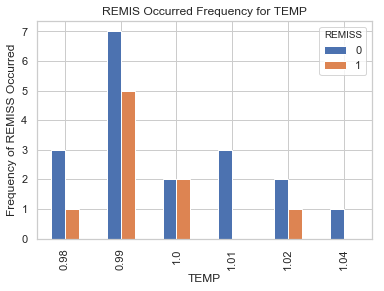

In [460]:
%matplotlib inline
for i in df.columns:
    if i=='REMISS':
        continue;
    pd.crosstab(df[i],data['REMISS']).plot(kind='bar')
    plt.title('REMIS Occurred Frequency for %s' % i)
    plt.xlabel(i)
    plt.ylabel('Frequency of REMISS Occurred')
    
df.columns

By observing the frequency, INFIL, LI, BLAST seems to have a more clear prediction

<span id="4"></span>
## 4. Traning set and Test set 
[[top]](#0)


In [461]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(x, y,  test_size=1/3)
print( "Features in Train ",xtrain.shape, "\nResponse in  Train",ytrain.shape)
print( "Features in Test ",xtest.shape, "\nResponse in  Test",ytest.shape)


Features in Train  (18, 6) 
Response in  Train (18,)
Features in Test  (9, 6) 
Response in  Test (9,)



<span id="5"></span>
## 5. Train a Logistic Regression Model

[[top]](#0)


In [462]:
# build the model with 5 fold cross validation
from sklearn.linear_model import LogisticRegressionCV
log_reg = LogisticRegressionCV(cv=5)
log_reg.fit(xtrain,ytrain) # train

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)



<span id="6"></span>
## 6. Coefficients

[[top]](#0)



In [463]:
print(log_reg.coef_)
print(log_reg.intercept_)
print(log_reg.n_iter_)


[[ 0.5986485  -0.0258999   0.26614894  2.23906892  0.59754212 -0.03280941]]
[-3.606436]
[[[ 7 11  9  8  9 12 18 28 33 59]
  [ 7 11  9  8  9 14 20 29 37 35]
  [ 7 10  9  8  9 13 17 27 41 39]
  [ 7 11  9  8  9 11 22 26 41 41]
  [ 7 11  9  8  9 11 17 24 26 36]]]




<span id="7"></span>
## 7. Accuracy and Confusion Matrix

[[top]](#0)


In [464]:
ypred = log_reg.predict(xtest)
print (ypred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(xtest, ytest)))

from sklearn.metrics import confusion_matrix ,classification_report, accuracy_score
confusion_matrix = confusion_matrix(ytest, ypred)


[0 1 0 1 1 1 0 0 0]
Accuracy of logistic regression classifier on test set: 0.78


### confusion matrix

In [465]:
print(confusion_matrix)


[[5 2]
 [0 2]]


### Classification Report


In [466]:
print(classification_report(ytest, ypred))
acc = accuracy_score(ytest, ypred)


              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.50      1.00      0.67         2

   micro avg       0.78      0.78      0.78         9
   macro avg       0.75      0.86      0.75         9
weighted avg       0.89      0.78      0.80         9



### Accuracy

In [467]:
print(acc * 100)

77.77777777777779



<span id="8"></span>
## 8. Decision Boundary

[[top]](#0)



In [468]:
log_reg.decision_function(x)

array([ 1.90536206,  0.55258769, -1.09734536, -0.63648468,  0.28326228,
       -1.22961559,  0.12357861,  2.188098  , -0.95001622, -1.87114057,
       -1.31767786, -0.32164623, -1.95139997, -1.65101189,  0.26037494,
        2.64572381, -2.00420563,  0.16741439, -1.88326527,  0.21343396,
       -1.95845767, -0.60810642, -0.34548622,  1.11567824,  1.48393821,
       -0.6203181 , -1.05852192])

**Predicting probabilitis - Probability for REMISS occurred ( Class = 1 )**

In [485]:
log_reg.predict_proba(x)[:,1]



array([0.8704972 , 0.63473575, 0.25023763, 0.34604161, 0.57034583,
       0.22624871, 0.5308554 , 0.8991756 , 0.27888156, 0.1334098 ,
       0.2112049 , 0.4202746 , 0.12440079, 0.16097224, 0.56472846,
       0.93374694, 0.11876206, 0.54175612, 0.13201427, 0.55315685,
       0.12363406, 0.35249127, 0.41447743, 0.75318619, 0.81516669,
       0.34970911, 0.25759202])

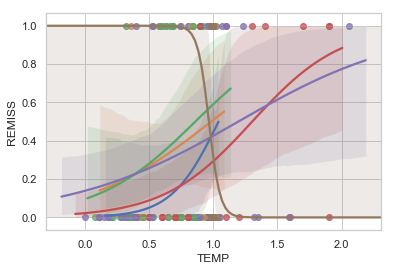

In [491]:
import seaborn as sns


for f in features:
    sns.regplot(x=f, y='REMISS', data=df, logistic=True)



<span id="9"></span>
## 9. Identify which of the following variables are positively associated with the target column. 

[[top]](#0)





<span id="10"></span>
## 10. Predict for Given 

[[top]](#0)


* CELL =  0.3
* SMEAR = 0.28
* INFIL = 0.09
* LI = 0.9
* BLAST = 0.21
* TEMP = 1.01

Predict REMIS

1. What is the model's computed probability that leukemia remission has occurred?
2. How confident are you in the model's accuracy of this probability calculation? (2 points)

In [492]:
newdata   = [[0.3,0.28,0.09,0.9,0.21,1.01],[0.9,0.75,0.68,1.3,0.52,0.98],[1.00,0.58,0.58,1.0,0.53,1.00]]
indata = pd.DataFrame(newdata,columns=['CELL','SMEAR','INFIL','LI','BLAST','TEMP'])
indata[['SMEAR','INFIL','LI','BLAST']]
#indata[['INFIL','BLAST']]

yhat  = log_reg.predict(indata[['CELL','SMEAR','INFIL','LI','BLAST','TEMP']])
#yhat  = log_reg.predict(indata[['SMEAR','INFIL','LI','BLAST']])
#yhat  = log_reg.predict(indata[['INFIL','BLAST']])


for i in range(0, len(newdata)):
    print( newdata[i]," Predicted REMISS ","Not Occurred" if yhat[i]==0 else "Occurred")




[0.3, 0.28, 0.09, 0.9, 0.21, 1.01]  Predicted REMISS  Not Occurred
[0.9, 0.75, 0.68, 1.3, 0.52, 0.98]  Predicted REMISS  Occurred
[1.0, 0.58, 0.58, 1.0, 0.53, 1.0]  Predicted REMISS  Not Occurred


In [493]:
indata.columns

Index(['CELL', 'SMEAR', 'INFIL', 'LI', 'BLAST', 'TEMP'], dtype='object')

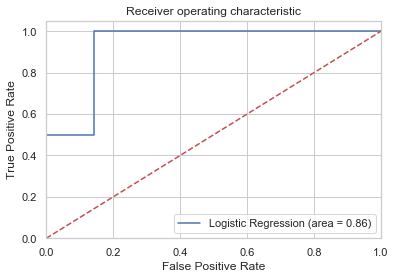

In [494]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(ytest, log_reg.predict(xtest))
fpr, tpr, thresholds = roc_curve(ytest, log_reg.predict_proba(xtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

A good classifier stays as far away from that line as possible (toward the top-left corner).
